In [11]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

data = pd.read_csv("S4SS.csv", index_col=0)
data.fillna(data.mean(), inplace=True)
interpretability = f_oneway(data["Interpretability 1"], data["Interpretability 2"])
fairness = f_oneway(data["Fairness 1"], data["Fairness 2"])
robustness = f_oneway(data["Robustness 1"], data["Robustness 2"])
safety = f_oneway(data["Safety 1"], data["Safety 2"])
# trustworthiness = f_oneway(data["Trustworthiness"])


In [8]:
print("Interpretability:", interpretability)
print("Fairness:", fairness)
print("Robustness:", robustness)
print("Safety:", safety)
# print("Trustworthiness:", trustworthiness)
trustworthiness_summary = data["Trustworthiness"].describe()
print("Trustworthiness summary:", trustworthiness_summary)



Interpretability: F_onewayResult(statistic=0.0, pvalue=1.0)
Fairness: F_onewayResult(statistic=142.94117647058786, pvalue=1.3490371808948459e-11)
Robustness: F_onewayResult(statistic=264.5084745762715, pvalue=1.8420425849759864e-14)
Safety: F_onewayResult(statistic=290.9027102154263, pvalue=6.420606662437195e-15)
Trustworthiness summary: count    13.000000
mean      3.923077
std       0.759555
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Trustworthiness, dtype: float64


In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

data = pd.read_csv("S4SS.csv", index_col=0)
data.fillna(data.mean(), inplace=True)
threshold = data["Trustworthiness"].median()
data["Trustworthiness_Binary"] = np.where(data["Trustworthiness"] >= threshold, "High", "Low")
data["Trustworthiness_Binary"] = data["Trustworthiness_Binary"].astype("category")
dependent_vars = data.drop(columns=["Trustworthiness", "Trustworthiness_Binary"])
independent_var = data["Trustworthiness_Binary"]
manova = MANOVA(endog=dependent_vars, exog=sm.tools.add_constant(independent_var))
manova_result = manova.mv_test()
print(manova_result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

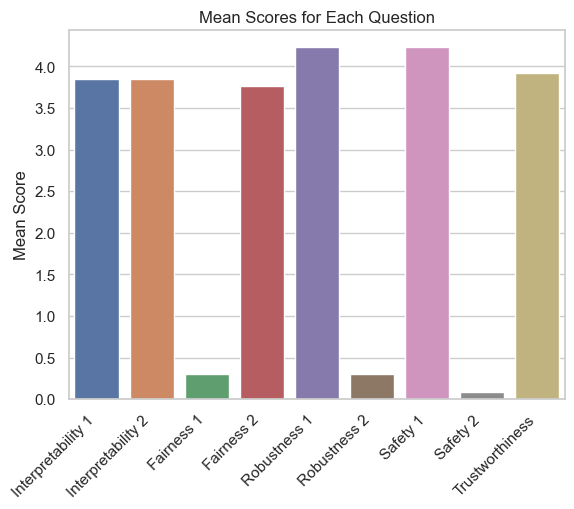

In [18]:
# Calculate the mean values for each question
mean_values = data.mean()

# Create a bar plot to visualize the mean values
ax = sns.barplot(x=mean_values.index, y=mean_values.values, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Mean Score")
ax.set_title("Mean Scores for Each Question")

# Show the plot
plt.show()




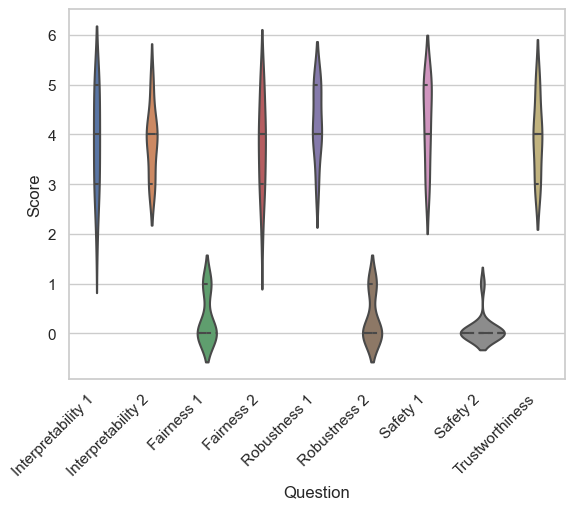

In [13]:
# Melt the dataframe for visualization
melted_data = pd.melt(data, var_name="Question", value_name="Score")

# Create a violin plot for each question
sns.set(style="whitegrid")
ax = sns.violinplot(x="Question", y="Score", data=melted_data, inner="quartile")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()


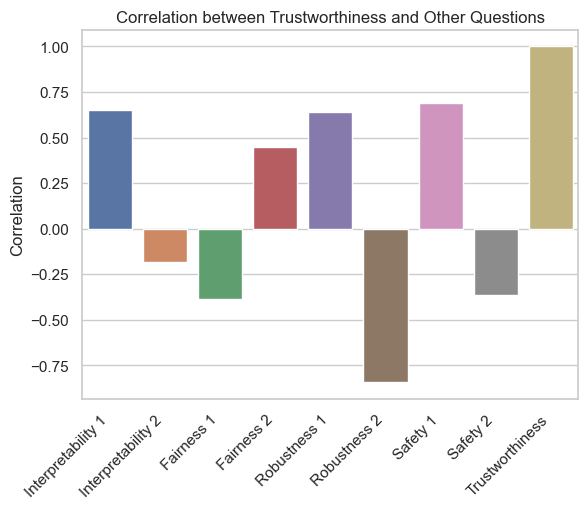

In [33]:
correlations = data.corr()["Trustworthiness"]
ax = sns.barplot(x=correlations.index, y=correlations.values, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Correlation")
ax.set_title("Correlation between Trustworthiness and Other Questions")

# Show the plot
plt.show()


In [20]:
from scipy.stats import pearsonr
# Initialize an empty dictionary to store the p-values
p_values = {}

# Iterate over the columns in the dataframe (excluding "Trustworthiness")
for column in data.columns:
    if column != "Trustworthiness":
        _, p_value = pearsonr(data["Trustworthiness"], data[column])
        p_values[column] = p_value
for column, p_value in p_values.items():
    print(f"{column}: {p_value:.4f}")


Interpretability 1: 0.0162
Interpretability 2: 0.5478
Fairness 1: 0.1920
Fairness 2: 0.1264
Robustness 1: 0.0184
Robustness 2: 0.0003
Safety 1: 0.0091
Safety 2: 0.2216


   m1  m2  m3
0   1   1   1
1   1   0   0
2   1   1   0
3   1   0   1
4   1   1   0


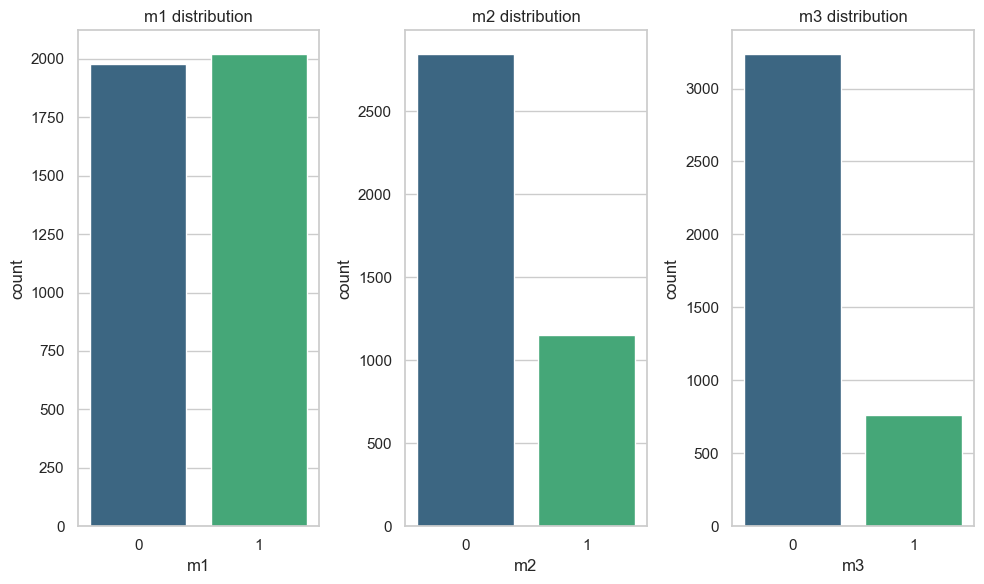

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('result.csv')

# Check the data
print(data.head())

# Plot the data
plt.figure(figsize=(10,6))

plt.subplot(1, 3, 1)
sns.countplot(x="m1", data=data, palette='viridis')
plt.title('m1 distribution')

plt.subplot(1, 3, 2)
sns.countplot(x="m2", data=data, palette='viridis')
plt.title('m2 distribution')

plt.subplot(1, 3, 3)
sns.countplot(x="m3", data=data, palette='viridis')
plt.title('m3 distribution')

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("S4SS.csv", index_col=0)

# Replace missing values with column means
data.fillna(data.mean(), inplace=True)

# Define the dependent variable
y = data["Trustworthiness"]

# Define the independent variables
X = data.drop("Trustworthiness", axis=1)

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the ordinary least squares regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the F-statistic of the model
f_statistic = results.fvalue
print("F-statistic: ", f_statistic)

# Get the R-squared value of the model
r_squared = results.rsquared
print("R-squared: ", r_squared)

print(results.summary())


F-statistic:  3.133044918252132
R-squared:  0.8623743963395445
                            OLS Regression Results                            
Dep. Variable:        Trustworthiness   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3.133
Date:                Wed, 10 May 2023   Prob (F-statistic):              0.142
Time:                        22:13:20   Log-Likelihood:                -1.4597
No. Observations:                  13   AIC:                             20.92
Df Residuals:                       4   BIC:                             26.00
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

c:\Users\Yueshen\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


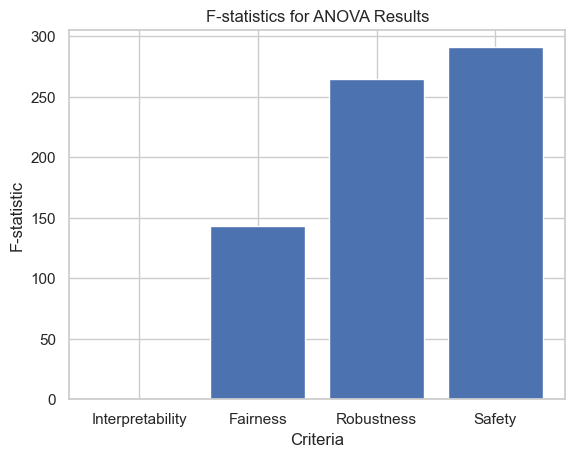

In [34]:
import matplotlib.pyplot as plt

criteria = ["Interpretability", "Fairness", "Robustness", "Safety"]
f_statistics = [0.0, 142.94, 264.51, 290.90]

plt.bar(criteria, f_statistics)
plt.xlabel("Criteria")
plt.ylabel("F-statistic")
plt.title("F-statistics for ANOVA Results")
plt.show()
